# Social Network Analysis with Python and NetworkX

Social Network Analysis (SNA) has a wide applicability in many scientific fields and industries. This workshop is a gentle introduction to SNA using Python and NetworkX, a powerful and mature python library for the study of the structure, dynamics, and functions of complex networks. Participants in this workshop should have a basic understanding of Python, no previous knowledge of SNA is assumed.

For this workshop attendees will need to install NetworkX (>=1.11), Matplotlib (>=1.5), numpy (>=1.10) and have a working Jupyter Notebook environment. Some examples will also use Pandas (>=0.17) and Seaborn (>=0.7), but these packages are not essential. Only basic Python knowledge is assumed.

## Outline

1. Brief Introduction to Graph Theory
    * Mathematical foundation of Social Network Analysis.
    * Why graphical representations usually doesn't help much.    
2. Creating and Manipulating Graphs
    * Data Structures: Graphs, DiGraphs, MultiGraphs and MultiDiGraphs.
    * Adding nodes and edges.
    * Adding and updating node and edge attributes.
    * Graph generators.
    * Visualizing graphs using Matplotlib.
    * Common formats for reading and writing Graphs. 
3. Network Analysis
    * Basic concepts: Degree.
    * Distance measures: paths, simple paths, and shortest paths.
    * Node centrality analysis: measures and their relation.
    * Analyzing groups and subgroups: Cliques, k-cores, components, and k-components.
4. Bipartite Graphs
    * Definition of bipartite networks and their use in modeling group affiliations.
    * Working with bipartite networks with NetworkX.

## Brief Introduction to Graph Theory

Social Network Analysis is an analytical approach to investigate social structures and phenomena which is based on Graph Theory. This approach is essentially relational and structural because it focuses on the patterns of relations between entities in a social system modeling them as **networked structures**.

These networked structures are characterized in terms of **nodes** or **vertices** (individual actors, people, or things within the network) and the **edges** or **links** (relationships or interactions) that connect them. From a mathematical point of view, these networked structures are modeled as **Graphs**.

We'll start with writing down some definitions that will be useful for reference in later parts of the workshop:


* A **Graph** $G=(V,E)$ consists of a set $V(G)$ of $n$ nodes and a set $E(G)$ of $m$ edges, each one linking a pair of nodes. The **order** of $G$ is its number of nodes $n$ and the **size** of $G$ is its number of edges $m$. Two nodes are adjacent if there is an edge that links them, and this edge is said to be incident with the two nodes it links. 

* A **subgraph** of $G$ is a graph whose nodes and edges are all in $G$. An **induced subgraph** $G[U]$ is a subgraph defined by a subset of nodes $U \subseteq V(G)$ with all the edges in $G$ that link nodes in $U$. A subgraph is **maximal** in respect to some property if the addition of more nodes to the subgraph will cause the loss of that property.

* A **path** is an alternating sequence of distinct nodes and edges in which each edge is incident with its preceding and following nodes. The length of a path is the number of edges it contains. A graph is connected if every pair of nodes is joined at least by one path.

* The **shortest path** between two nodes is a path with the minimum number of edges. The **distance** between any two nodes $u$ and $v$ of $G$, denoted $d_{G}(u,v)$, is the length of the shortest path between them. The **diameter** of a graph $G$, denoted $diam(G)$, is the length of the longest shortest path between any pair of nodes of $G$.

* **Node independent paths** are paths between two nodes that share no nodes in common other than their starting and ending nodes.

* A **component** of a graph $G$ is a maximal connected subgraph, which means that there is at least one path between any two nodes in that subgraph.

* The **density** of a graph $G$, denoted $\varrho(G)$, measures how many edges are in set $E(G)$ compared to the maximum possible number of edges among nodes in $V(G)$. Thus, density is calculated as $\varrho(G) = \frac{2m}{n(n-1)}$.

* A **complete graph** is a graph in which all possible edges are present, so its density is 1. A **clique** is an induced subgraph $G[U]$ formed by a subset of nodes $U \subseteq V(G)$ if, and only if, the induced subgraph $G[U]$ is a complete graph. Thus, there is an edge that links each pair of nodes in a clique. 

* The **degree** of a node $v$, denoted $deg(v)$, is the number of edges that are incident with $v$. The minimum degree of a graph $G$ is denoted $\delta(G)$ and it is the smallest degree of a node in $G$.

* A $k$-core of $G$ is a maximal subgraph in which all nodes have degree greater or equal than $k$; which means that a $k$-core is a maximal subgraph with the property $\delta \ge k$. The **core number** of a node is the largest value $k$ of a $k$-core containing that node.

* The removal of a node $v$ from $G$ results in a subgraph $G - v$ that does not contain $v$ nor any of its incident edges.

* The **node connectivity** of a graph $G$ is denoted $\kappa(G)$ and is defined as the minimum number of nodes that must be removed in order to disconnect the graph $G$. Those nodes that must be removed to disconnect $G$ form a **node cut-set**. If it is only necessary to remove one node to disconnect $G$, this node is called an **articulation point**.

* We can also define the **local node connectivity** for two nodes $u$ and $v$, denoted $\kappa_{G}(u,v)$, as the minimum number of nodes that must be removed in order to destroy all paths that join $u$ and $v$ in $G$. Then the **node connectivity** of $G$ is equal to $min{\{\kappa_{G}(u,v):u,v \in V(G)\}}$.

* Similarly, the **edge connectivity** of a graph $G$ is denoted $\lambda(G)$ and is defined as the minimum number of edges that must be removed in order to disconnect the graph $G$. The edges that must be removed to disconnect $G$ form an **edge cut-set**.

* A **$k$-component** is a maximal subgraph of a graph $G$ that has, at least, node connectivity $k$: we need to remove at least $k$ nodes to break it into more components. The **component number** of a node is the largest value $k$ of a $k$-component containing that node. Notice that $k$-components have an inherent hierarchical structure because they are nested in terms of connectivity: a connected graph can contain several 2-components, each of which can contain one or more tricomponents, and so forth. 


Usually networks and graphs are graphically represented in two dimensions by plotting nodes as dots and edges as lines joining these dots. These graphical representations are aestetically pleasing but they are seldom useful to gasp the structure of networks because they reduce to a two dimensional plot a set of relations that have a lot more dimensions.

We'll brefly see how to plot Graphs using NetworkX and Matplotlib but the focus of this workshop will be the analysis of graphs.

## Creating and Manipulating Graphs using NetworkX

NetworkX is a python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

The current version of NetworkX is 1.11 but the new 2.0 version will be released soon. The code provided in this workshop will work on both but if you know how to install the development version of NetworkX you will get better performance and more features.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

NetworkX version: 2.1


### Data Structures: Graphs, DiGraphs, MultiGraphs and MultiDiGraphs


* **Graph**: Undirected graph, allows self-loops

* **DiGraph**: Directed graph, allows self-loops

* **MultiGraph**: Undirected graph with parallel edges, allows self-loops

* **MultiDiGraph**: Directed graph with parallel edges, allows self-loops

In [2]:
G = nx.Graph()
D = nx.DiGraph()
MG = nx.MultiGraph()
MDG = nx.MultiDiGraph()

#### Internal Graph representation
Common graph representations, for instance of a complete undirected graph of 3 nodes (ie a triangle):

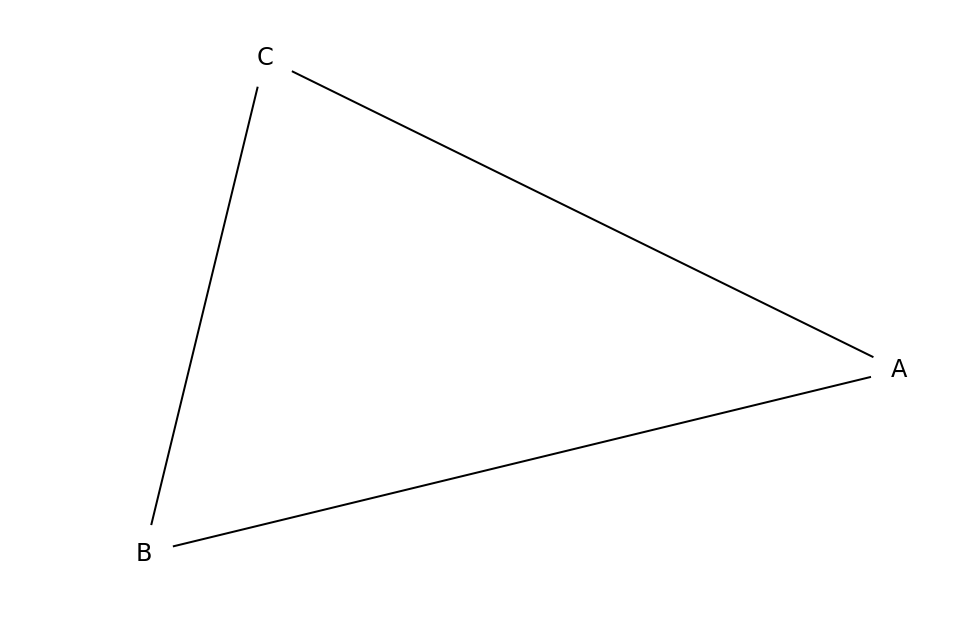

In [3]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C')])
nx.draw(G, node_size=800, node_color='white', with_labels=True)


**Adjacency Matrix** A $n x n$ matrix:

        0  1  1        G = [[0, 1, 1],
        1  0  1             [1, 0, 1],
        1  1  0             [1, 1, 0]]

**Adjacency List** A list of neighbors:

        A: B, C        G = {'A': ['B', 'C'],
        B: A, C             'B': ['A', 'C'],
        C: A, B             'C': ['A', 'B']} 

**Edge List** A list of edges:

        A B            G = [['A', 'B'],
        A C                 ['A', 'C'],
        B C                 ['B', 'C']]

NetworkX uses a __dictionary of dictionaries__ based **Adjacency List** format which is fast and ligthweight for sparse graphs. This approach is inspired on Guido van Rossum's essay [Python Patterns - Implementing Graphs](https://www.python.org/doc/essays/graphs/) and in the work of David Eppstein on [Python Algorithms and Data Structures](https://www.ics.uci.edu/~eppstein/PADS/).

This approach allows for natural expressions such as:

* **n in G** to test if the graph $G$ contains node $n$
* **for n in G** to loop over all nodes
* **G[n]** to access all neighbors of $n$ in $G$
* **len(G)** to get the number of nodes in $G$

Internally the node $n$ is a key in the $G.adj$ dictionary, values are themselves dictionaries with neighbors as keys and another dictionary as value that holds edge attributes.

So NetworkX graphs are "dictionaries all the way down". This is not exactly true in version 2.0 but it is safe for users to think of it this way. 

In [4]:
print(G.adj)

{'A': {'B': {}, 'C': {}}, 'B': {'A': {}, 'C': {}}, 'C': {'A': {}, 'B': {}}}


In [5]:
'A' in G

True

In [6]:
for n in G:
    print(n)

A
B
C


In [7]:
G['A']

AtlasView({'B': {}, 'C': {}})

In [8]:
len(G)

3

### Creating Graphs and adding and removing Nodes and Edges

NetworkX is a node centric package; nodes can be any hashable object.

A graph $G$ can be grown in several ways:

* Adding nodes with:
    - **G.add_node** : One node at a time
    - **G.add_nodes_from** : A conteiner of nodes
* Adding edges with:
    - **G.add_edge**: One edge at a time
    - **G.add_edges_from** : A container of edges


In [9]:
# Create an undirected Graph
G = nx.Graph()
# One node at a time
G.add_node(1)  # "method" of G
# A list of nodes
G.add_nodes_from([2, 3])
# A container of nodes
H = nx.path_graph(10)
G.add_nodes_from(H) # G now contains the nodes of H
# In contrast, you could use the graph H as a node in G. 
G.add_node(H) # G now contains Graph H as a node 

G can also be grown by adding edges.

If the edge added already exists no error is raised.

If the nodes referred by edges do not already exist they are automatically added to the graph.

In [10]:
# Adding a single edge
G.add_edge(1, 2)
# If you have a tuple representing an edge you have to unpack it
e = (2, 3)
G.add_edge(*e) # unpack edge tuple with *
# Add a list of edges 
G.add_edges_from([(1, 2), (1, 3)])
# Add from a container of edges
G.add_edges_from(H.edges())

Similarly you can remove nodes and edges

* Removing nodes with:
    - **G.remove_node** : One node at a time
    - **G.remove_nodes_from** : A conteiner of nodes
* Adding edges with:
    - **G.remove_edge**: One edge at a time
    - **G.remove_edges_from** : A container of edges


### Adding and removing Graph, Node, and Edge Attributes

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary.

In [11]:
# Assign graph attributes when creating a new graph
G = nx.Graph(day='Friday', name='My Graph')
G.graph # Access to the dictionary that stores graph attrs

{'day': 'Friday', 'name': 'My Graph'}

In [12]:
# Or you can modify attributes later
G.graph['day']='Monday'
G.graph

{'day': 'Monday', 'name': 'My Graph'}

#### Nofde Attributes

In order to add node attributes you can use the methods **G.add_node** and **G.add_nodes_from**, or the node attribute dictionary **G.node**

In [13]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm') # multiple nodes
G.node[1]['room'] = 714 # add new attribute

Adding a node that is already in the graph does not raise an error, you can add new attributes to an existing node by adding it again with a new attribute:  

In [14]:
G.add_node(3, room=715)

In order to access node attribute information you can:

In [15]:
# Access the value of the attribute
G.node[1]['time']

'5pm'

In [16]:
# Access the attribute dictionary
G.node[1]

{'time': '5pm', 'room': 714}

In practice it's usually more useful to iterate over nodes with their attributes 

In [17]:
# Nodes without attributes
list(G.nodes())

[1, 3]

In [18]:
# Tuples of node and attribute dictionary
list(G.nodes(data=True))

[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm', 'room': 715})]

In [19]:
# In NetworkX version 2.0 you can also directly specify the node attribute in the data keyword
if nx.__version__.startswith('2'):
    print(list(G.nodes(data='room')))

[(1, 714), (3, 715)]


You can also set node attributes using the function **nx.set_node_attributes**. Its arguments are a graph object, a string with the name of the attribute, and a dictionary keyed by node with the value of the attribute for each node or a single value that will be used for all nodes:

In [20]:
nx.set_node_attributes(G, name='grade', values={1: 'A', 3:'C'})

In [21]:
nx.set_node_attributes(G, 'year', 2017)

You can get a dictionary keyed by node with the value of a node attribute with the function **nx.get_node_attributes**:

In [22]:
nx.get_node_attributes(G, 'time')

{1: '5pm', 3: '2pm'}

#### Edge Attributes

In order to add edge attributes you can use the methods **G.add_edge** and **G.add_edges_from**; the edge attribute dictionary **G.edge** or subscript notation.

In [23]:
G.add_edge(1, 2, weight=4.0 )
G.add_edges_from([(3, 4),(4, 5)], color='red')
G.add_edges_from([(1, 2, {'color':'blue'}), (2, 3, {'weight':8})])
# When an edge is already added you can use subscript notation or update the edge attribute dictionary
G[1][2]['weight'] = 4.0


Adding an edge that is already in the graph does not raise an error, you can add new attributes to an existing edge by adding it again with a new attribute:  

In [24]:
G.add_edge(3, 4, weight=12)

In order to access edge attribute information you can:

In [25]:
# Access the value of attribute weight
G[1][2]['weight'] # or equivalently G.edge[1][2]['weight']

4.0

In [26]:
# Attributes dictionary for edge 1 -- 2
G[1][2] # or equivalently G.edge[1][2]

{'weight': 4.0, 'color': 'blue'}

In practice it's usually more useful to iterate over edges with their attributes 

In [27]:
# Edges without attributes
list(G.edges())

[(1, 2), (3, 4), (3, 2), (4, 5)]

In [28]:
# Edges as tuples of nodes and edge attributes
list(G.edges(data=True))

[(1, 2, {'weight': 4.0, 'color': 'blue'}),
 (3, 4, {'color': 'red', 'weight': 12}),
 (3, 2, {'weight': 8}),
 (4, 5, {'color': 'red'})]

In [29]:
# In NetworkX version 2.0 you can also directly specify the edge attribute in the data keyword
if nx.__version__.startswith('2'):
    print(list(G.edges(data='weight')))

[(1, 2, 4.0), (3, 4, 12), (3, 2, 8), (4, 5, None)]


You can also set edge attributes using the function **nx.set_edge_attributes**. Its arguments are a graph object, a string with the name of the attribute, and a dictionary keyed by edge with the value of the attribute for each edge or a single value that will be used for all edges:

In [30]:
nx.set_edge_attributes(G, 'capacity', 1)

In [31]:
nx.set_edge_attributes(G, name='friendship', values={(1, 2): True, (2, 3): False, (3, 4): False, (4, 5): True})

You can get a dictionary keyed by edge with the value of an edge attribute with the function **nx.get_edge_attributes**:

In [32]:
nx.get_edge_attributes(G, 'friendship')

{(1, 2): True, (3, 4): False, (3, 2): False, (4, 5): True}

An useful method for quickly looking at our graph is **nx.info**

In [33]:
print(nx.info(G))

Name: My Graph
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000


### Exercise: Building a Graph

Build an undirected graph with 50 nodes named as integers from 1 to 50.

Add edges between nodes with consecutive numbers, that is, node 1 should have and edge to node 2, node 2 to node 3, etc ...

Add a node attribute named **kind** with the value **odd** if the node is odd or **even** if the node is even:

Add an edge attribute named **product** with the value of the product of the two nodes that it links.

Build a set with all nodes that have **odd** as the value of node attribute **kind** 

Build a set of edges that have a value greater than 2000 for their edge attribute **product**

### More ways to build graphs: operators.

Applying classic graph operations

* **nx.subgraph(G, node_list)** : induce subgraph of G on nodes in node_list
* **nx.union(G1,G2)** : graph union
* **nx.disjoint_union(G1,G2)** : graph union assuming all nodes are different
* **nx.cartesian_product(G1,G2)**: return Cartesian product graph
* **nx.compose(G1,G2)**:  combine graphs identifying nodes common to both
* **nx.complement(G)**: graph complement
* **nx.create_empty_copy(G)**: return an empty copy of the same graph class

### Graph Generators

Take a look at all NetworkX [Graph generators](http://networkx.readthedocs.io/en/stable/reference/generators.html)

Some examples:

In [34]:
# small graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

# classic graphs
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

# random graphs
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

### Drawing graphs with matplotlib

NetworkX is not focused on graphic representations of graphs. However it has a pretty decent module for plotting networks with Matplotlib, it does not produce top quality plots but it's useful for simple plots. In the future the plotting module could be separated from NetworkX in a new package in order to facilitate its development.   

NetworkX contains a set of graph layout algorithms that position nodes in 2 and 3-dimensions in order to plot them.

As we discussed before, plotting graphs, especially if they are big, seldom helps to analyze them. However if graphs are small or if we only want to highlight a few features of nodes, edges, or the whole graph it can be useful.

Now we'll see a general view of NetworkX plotting capabilities, and latter we'll also use some plots to highlight some of the more complex network analysis.

We'll use as an example the graph of Florentine families

In [35]:
G = nx.florentine_families_graph()

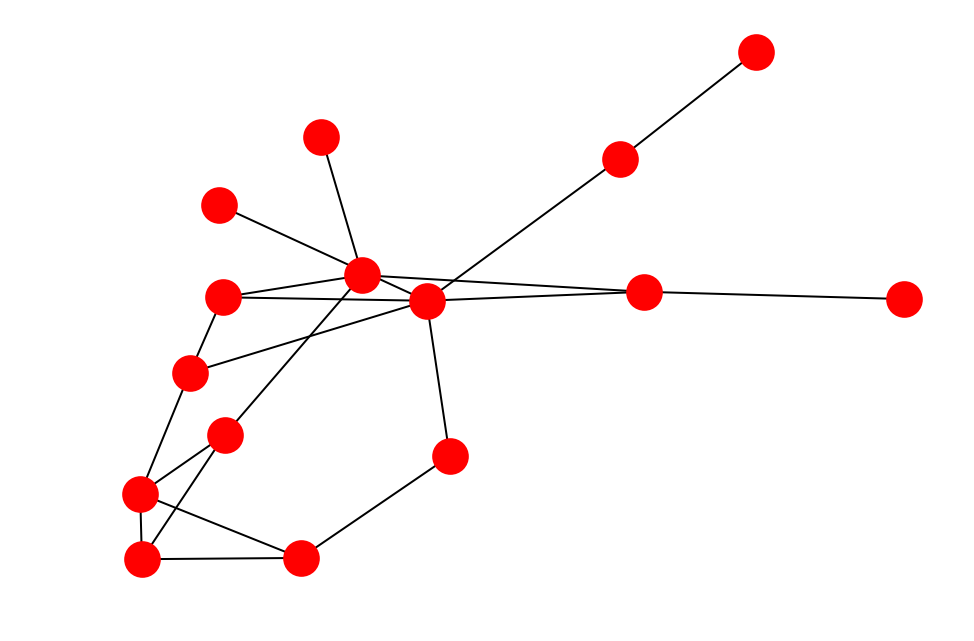

In [36]:
# The function nx.draw is main entry point for NetworkX plotting functions
nx.draw(G)

By default, the layout (that is the position of the nodes in the 2D plane) used is the spring layout. NetworkX, especially in the upcoming 2.0 version, has some more interesting layout algorithms. We can precompute the layout for a given graph and then pass it to the **nx.draw** function

In [37]:
pos_spring = nx.spring_layout(G)
pos_fr = nx.fruchterman_reingold_layout(G)
pos_fr

{'Acciaiuoli': array([0.30367461, 0.422885  ]),
 'Medici': array([0.03018365, 0.22561442]),
 'Castellani': array([-0.38340971, -0.45192208]),
 'Peruzzi': array([-0.22002796, -0.69168048]),
 'Strozzi': array([-0.15876332, -0.47854223]),
 'Barbadori': array([-0.3003547 , -0.08472529]),
 'Ridolfi': array([-0.02401378, -0.13378726]),
 'Tornabuoni': array([0.18437974, 0.00606136]),
 'Albizzi': array([-0.10188281,  0.16080855]),
 'Salviati': array([0.07635846, 0.67468579]),
 'Pazzi': array([0.12308559, 1.        ]),
 'Bischeri': array([ 0.05029271, -0.56080845]),
 'Guadagni': array([ 0.21317304, -0.20933527]),
 'Ginori': array([-0.35983558,  0.41819767]),
 'Lamberteschi': array([ 0.56714006, -0.29745173])}

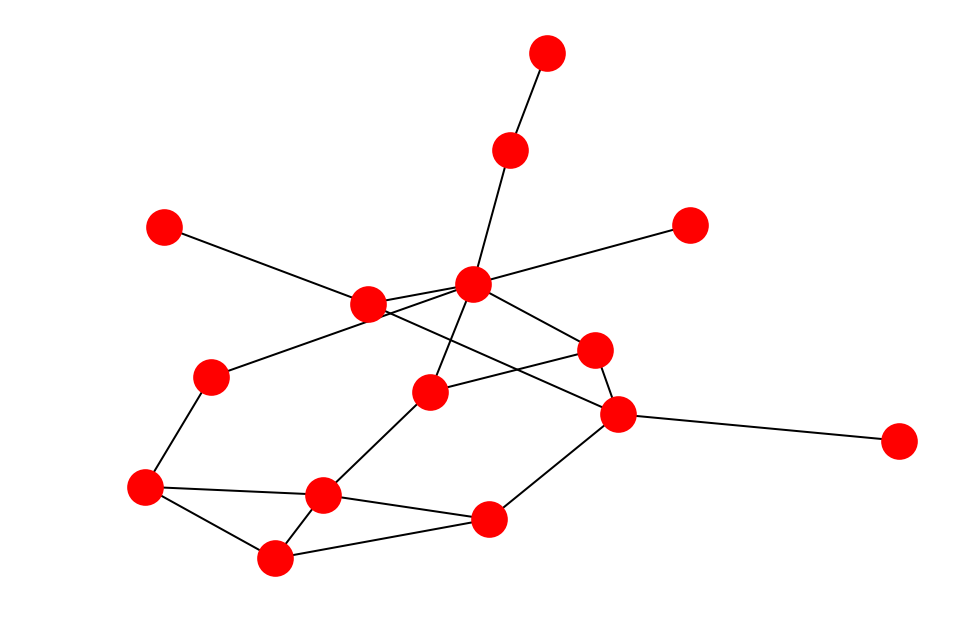

In [38]:
nx.draw(G, pos=pos_fr)

We can also control the size and color of the nodes, the with of the edges, the labels of the nodes and their fonts via *kwargs* of **nx.draw**:

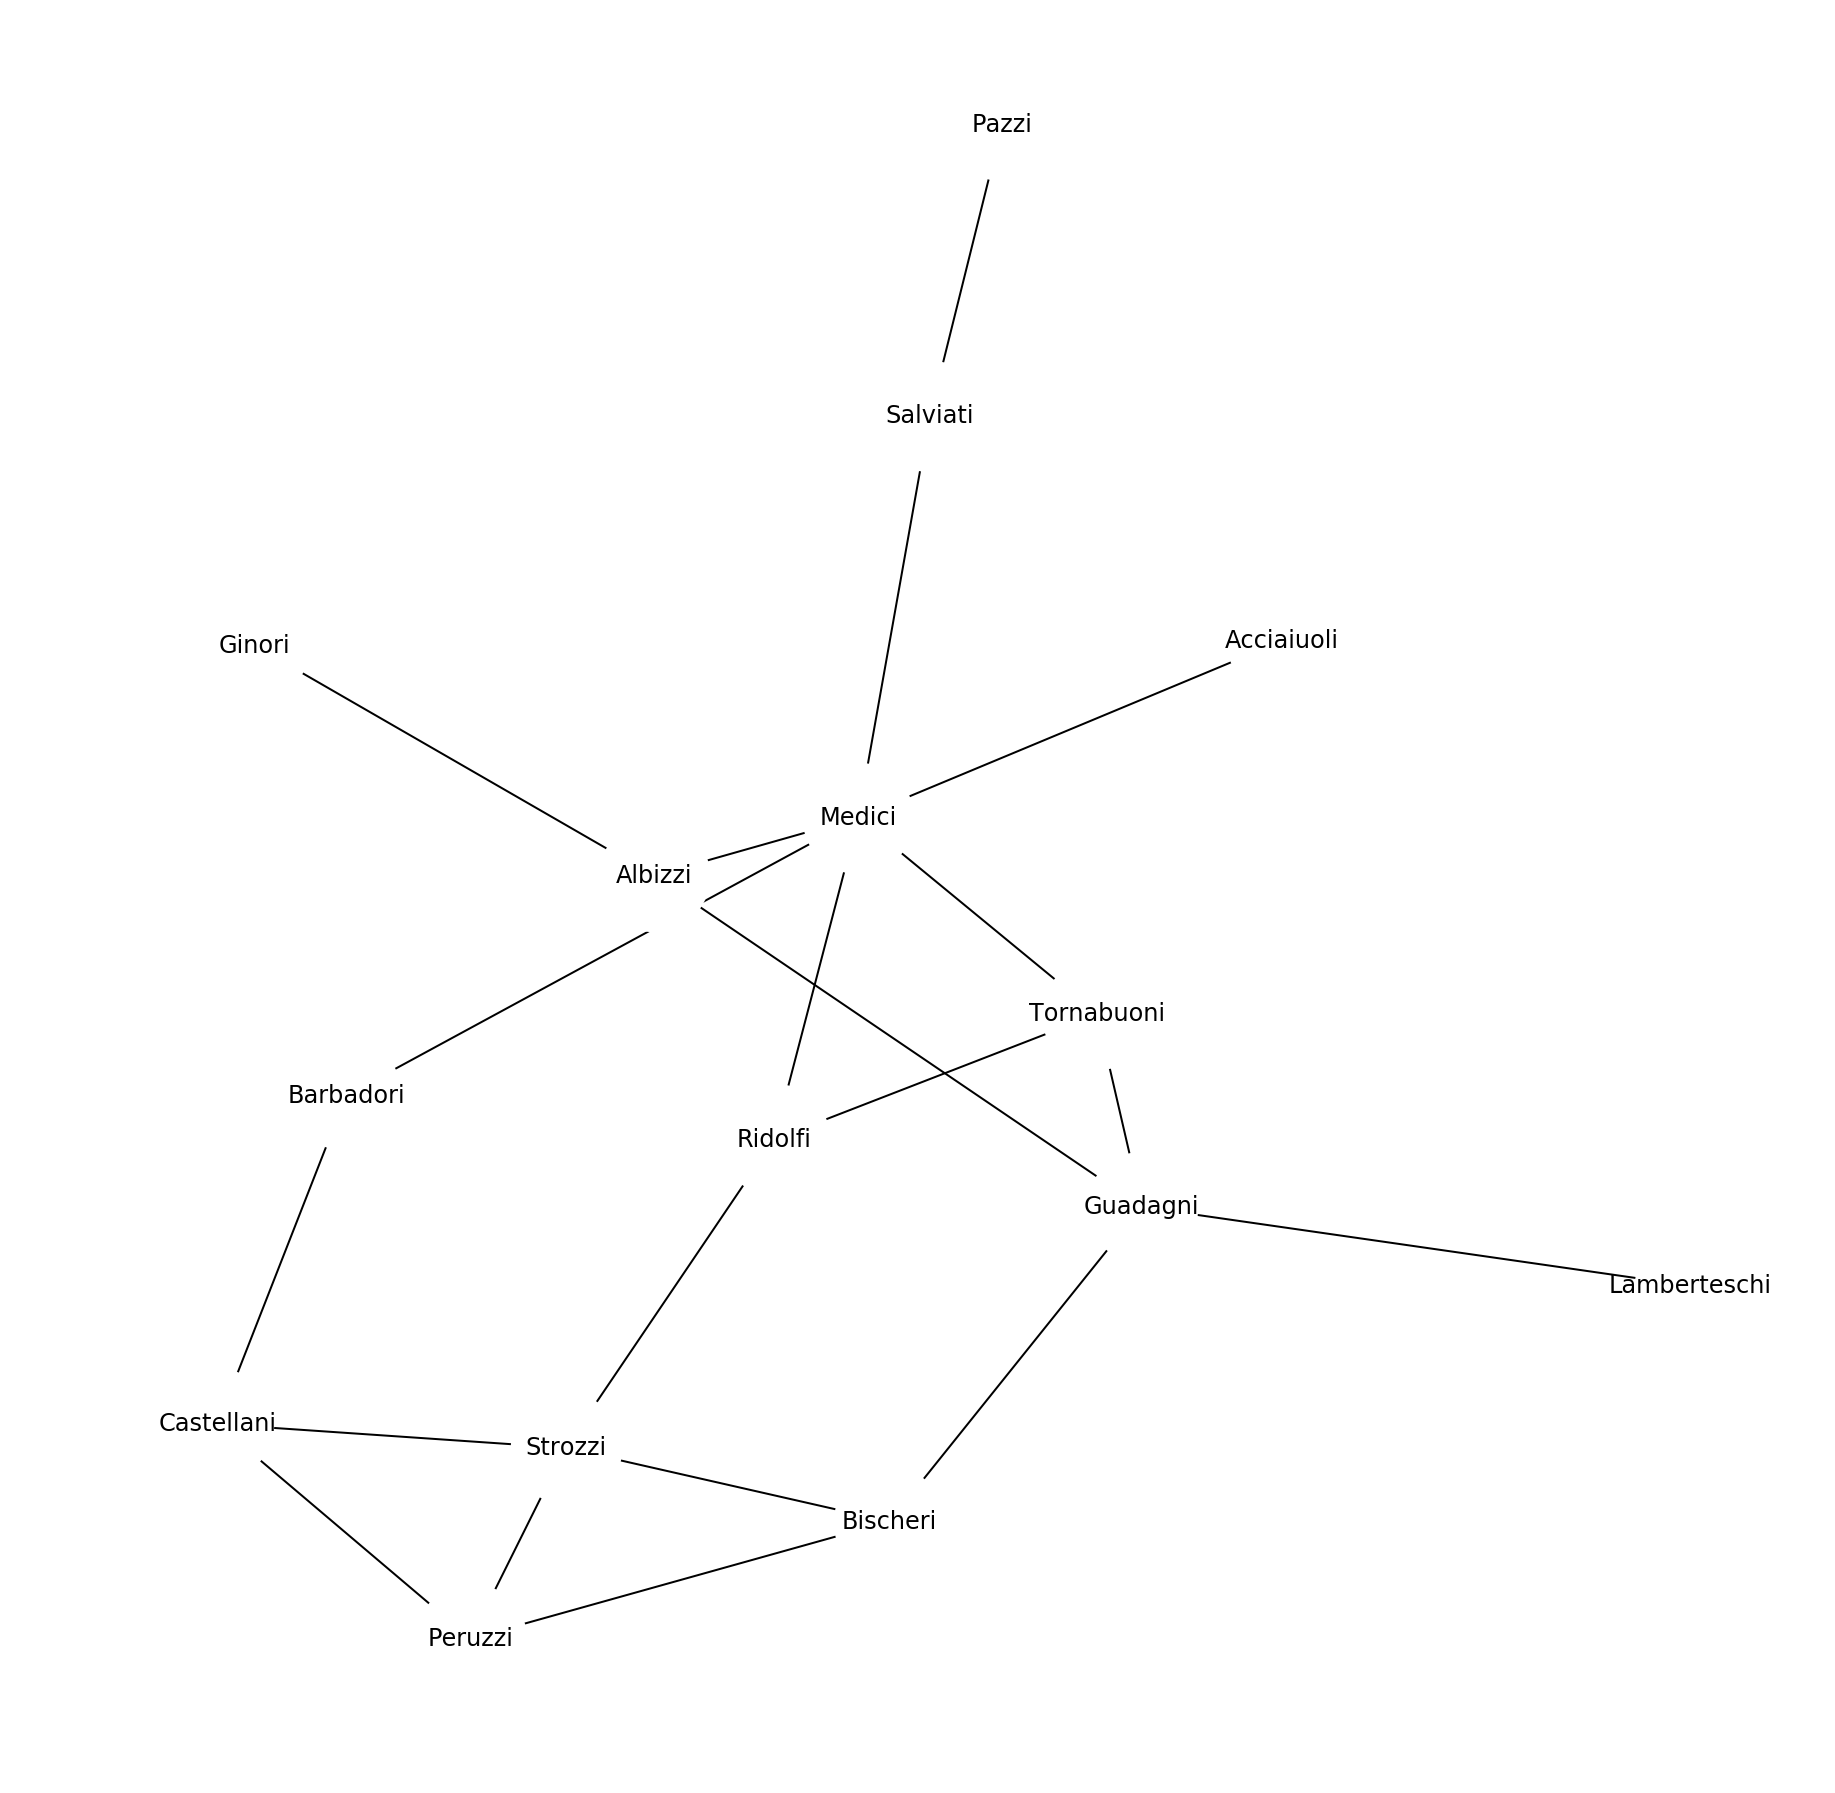

In [39]:
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='white', with_labels=True)

If we want to plot more complex plots, for instance, plot nodes of different colors and sizes, add labels to only some nodes, add edge labels, etc ... We have to use more specialized plot functions such as:

* **nx.draw_networkx_nodes**
* **nx.draw_networkx_edges**
* **nx.draw_networkx_lables**
* **nx.draw_networkx_edge_lables**

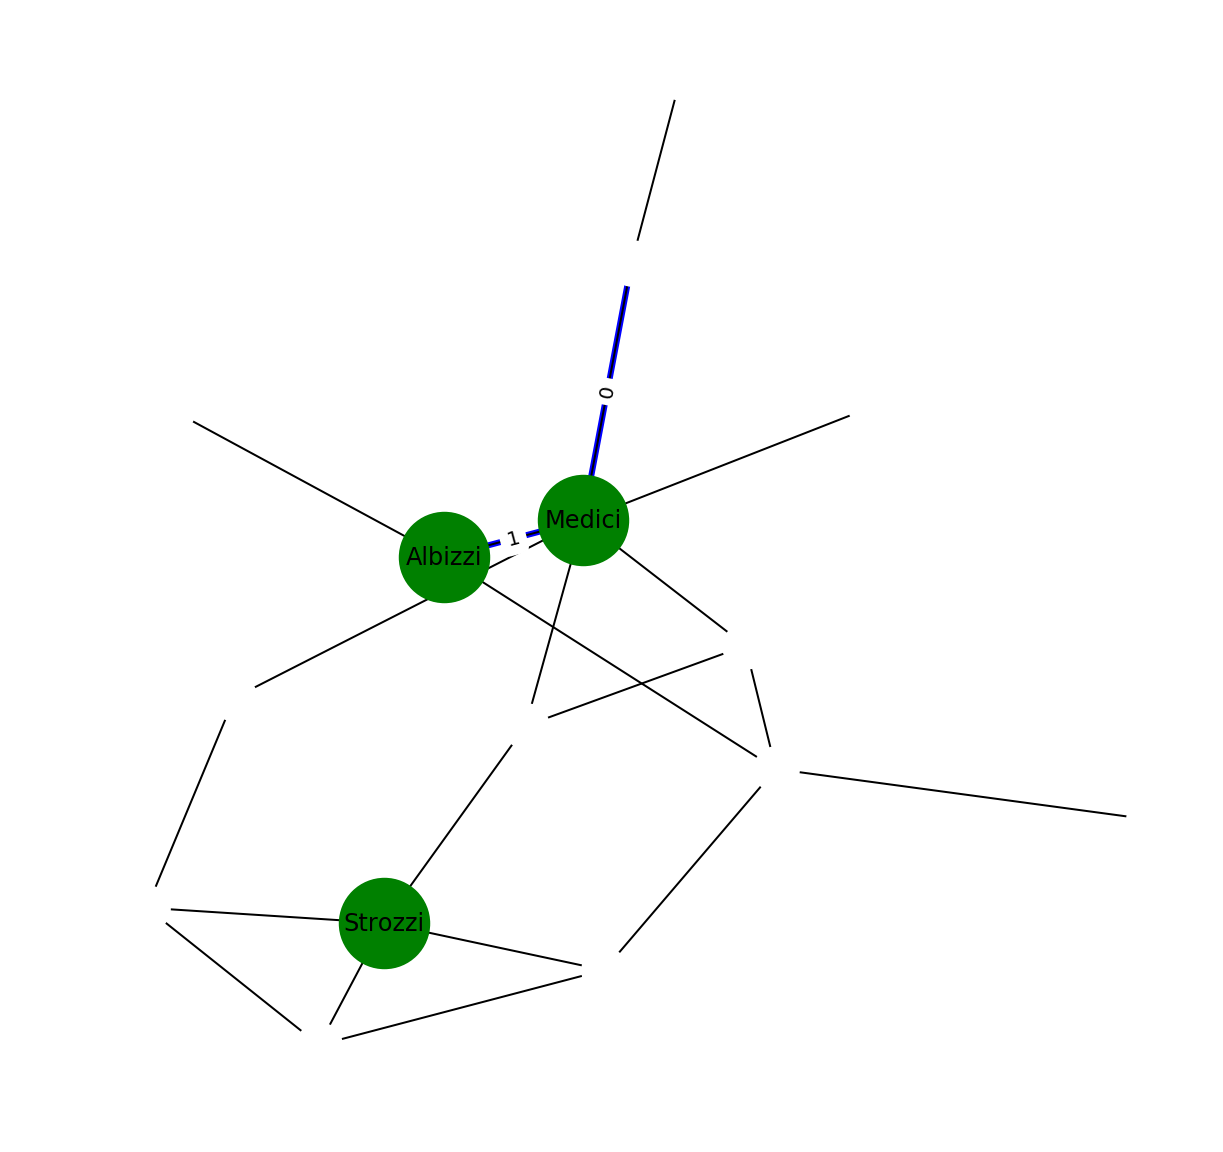

In [40]:
plt.figure(figsize=(10,10))
big_and_green_nodes = {'Medici', 'Albizzi', 'Strozzi'}
other_nodes = set(G) - big_and_green_nodes
thick_edges = {('Medici', 'Albizzi'), ('Medici', 'Salviati')}
other_edges = set(G.edges()) - thick_edges
# Plot nodes
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=big_and_green_nodes, node_size=2000, node_color='green')
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=other_nodes, node_size=500, node_color='white')
# Plot edges 
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=thick_edges, width=3, edge_color='blue')
nx.draw_networkx_edges(G, pos=pos_fr, edge_list=other_edges)
# Plot node labels
nx.draw_networkx_labels(G, pos=pos_fr, labels={n: n for n in big_and_green_nodes})
# Plot edge labels
nx.draw_networkx_edge_labels(G, pos=pos_fr, edge_labels={e: i for i, e in enumerate(thick_edges)})
# Remove axes
ax = plt.gca()
ax.set_axis_off()

### Common formats for reading and writing Graphs

You can see the complete list of supported formats at [Read and Write documentation](http://networkx.readthedocs.io/en/stable/reference/readwrite.html)

Some examples of the most common formats:

* **Adjacency list** Simple format, no attributes
    - **nx.read_adjlist**
    - **nx.write_adjlist**
* **Edge list** Simple format, no attributes
    - **nx.read_edgelist**
    - **nx.write_adjlist**
* **GEXF** Designed to be a standard exchange format for graphs (Gephi)
    - **nx.read_gexf**
    - **nx.write_gexf**
* **GML** Hierarchical ASCII-based file format for describing graphs
    - **nx.read_gml**
    - **nx.write_gml**
* **Pickle** Python standard persistency module (serialize objects to HD)
    - **nx.read_gpickle**
    - **nx.write_gpickle**
* **GraphML** An XML-based file format for graphs
    - **nx.read_graphml**
    - **nx.write_graphml**
* **Pajek** Popular network format used in Pajek (no complete written specification)
    - **nx.read_pajek**
    - **nx.write_pajek**

## Network Analysis

Now we'll focus on some key analysis techniques that will allow us to understand the structure of social networks and the importance of its components

### Basic concepts: Degree

The degree of a node it's the number of incident edges to that node.

* **undirected graphs** it'is equal to their number of neighbors.

* **directed graphs** we have to distinguish between incoming edges and ougoing edges, and thus we have to distinguish between successors and predecessors.
    - **In-degree** Number of predecessors
    - **Out-degree** Nuber of successors

#### Undirected Graphs

{0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 1}

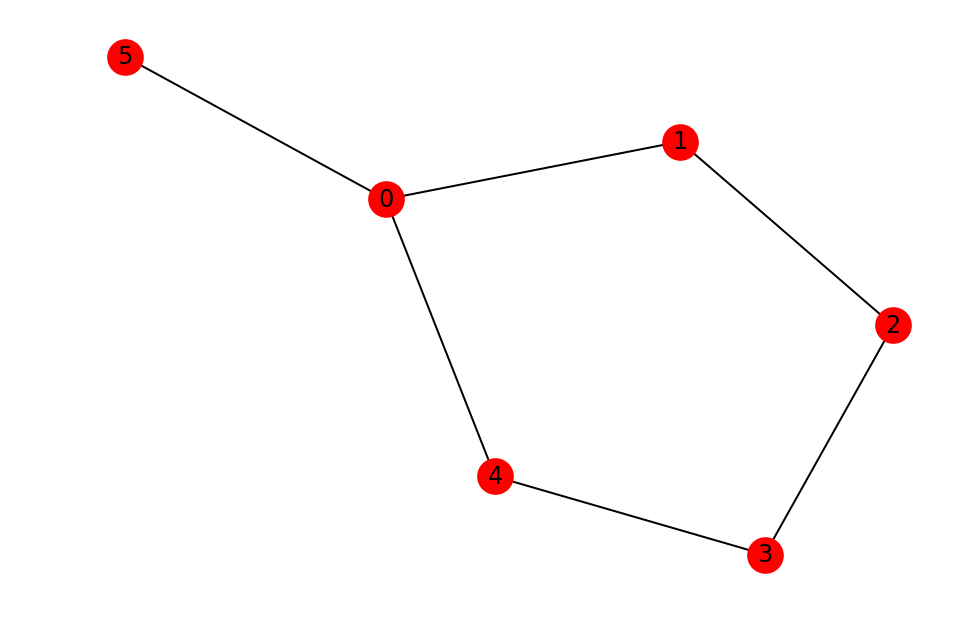

In [41]:
G = nx.cycle_graph(5)
G.add_edge(0, 5)
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
dict(G.degree())

In [42]:
# You can also get the degree for a single node
G.degree(5)

1

#### Quick exercise
How to select the node with the greatest degree?

In [43]:
# We can get the neighbors of node 0
list(G.neighbors(0))

[1, 4, 5]

In [44]:
# We can also access the neighbors, along with the edge labels (empty in this example)
# using the subscript notation
G[0]

AtlasView({1: {}, 4: {}, 5: {}})

#### Directed Graphs

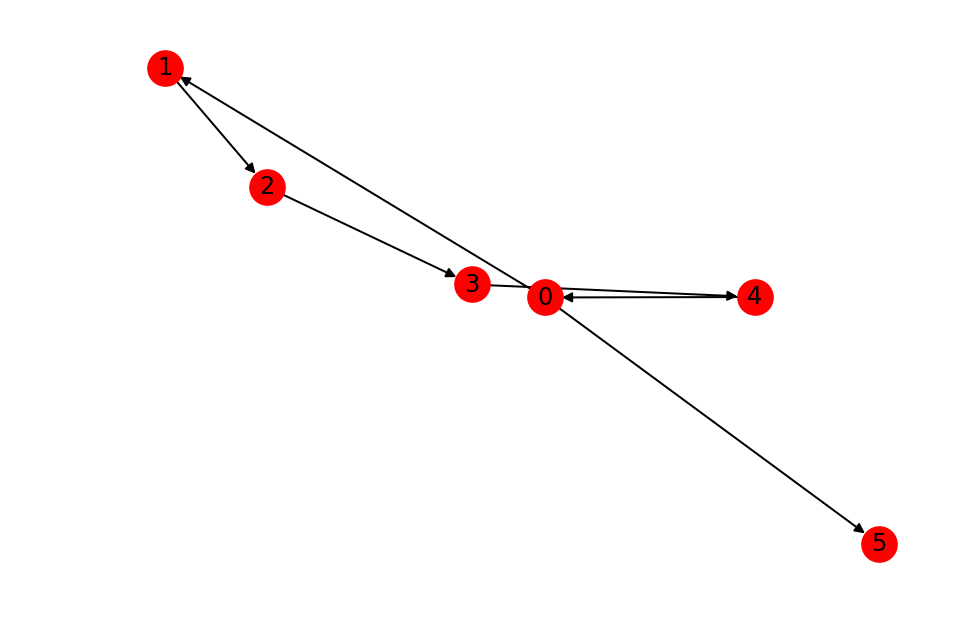

In [45]:
D = nx.cycle_graph(5, create_using=nx.DiGraph())
D.add_edge(0, 5)
nx.draw(D, pos=nx.fruchterman_reingold_layout(D), with_labels=True)

In [46]:
dict(D.in_degree())

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

In [47]:
dict(D.out_degree())

{0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0}

In [48]:
# We can get the successors of a node
list(D.successors(0))

[1, 5]

In [49]:
# And it's predecessors
list(D.predecessors(0))

[4]

In [50]:
# For digraphs the subscript notation yields the successors for a node
D[0]

AtlasView({1: {}, 5: {}})

#### Weighted Graphs and weighted degree

Edges can have attributes, a very common and useful edge attribute is **weight** which is used to model intensity of relations.

The weighted degree of a node is the sum of the weights of its incident edges. 

{(0, 1): Text(-0.785836,0.193528,'1'),
 (0, 4): Text(-0.379147,-0.789927,'2'),
 (1, 2): Text(-0.0323565,0.896406,'3'),
 (2, 3): Text(0.666631,0.289927,'4'),
 (3, 4): Text(0.530708,-0.589934,'5')}

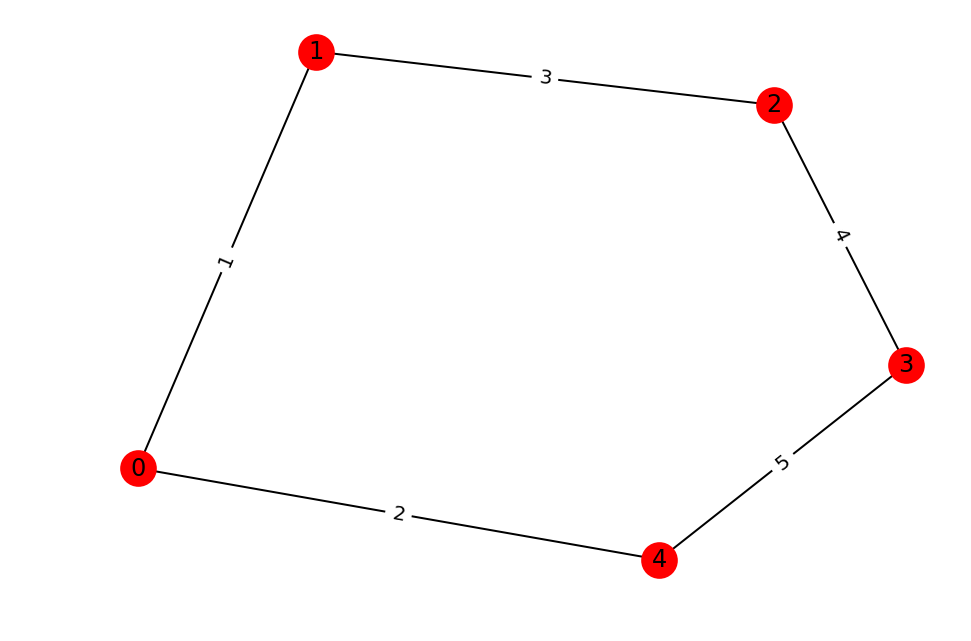

In [51]:
W = nx.cycle_graph(5)
for i, (u, v) in enumerate(W.edges(), 1):
    W[u][v]['weight'] = i
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

In [52]:
dict(W.degree())

{0: 2, 1: 2, 2: 2, 3: 2, 4: 2}

In [53]:
dict(W.degree(weight='weight'))

{0: 3, 1: 4, 2: 7, 3: 9, 4: 7}

#### Quick exercise
How can we get the node with greatest weighted degree using the build-in **max** function?

Two possible approaches: use **partial** from the **functools** module or compute first the weighted degree for all nodes. 

### Paths, simple paths, and shortest paths

* A **path** is an alternating sequence of distinct nodes and edges in which each edge is incident with its preceding and following nodes. The length of a path is the number of edges it contains. 

* A **simple path** is a path with no repeated nodes. See NetworkX documentation for [simple paths](http://networkx.readthedocs.io/en/stable/reference/algorithms.simple_paths.html).

* The **shortest path** between two nodes is a path with the minimum number of edges. The **distance** between any two nodes $u$ and $v$ of $G$, denoted $d_{G}(u,v)$, is the length of the shortest path between them. See NetworkX documentation for [shortest paths](http://networkx.readthedocs.io/en/stable/reference/algorithms.shortest_paths.html).

NetworkX has high level functions for simple paths and shortest paths that accept directed, undirected and multigraphs and do the right thing. For instance, for directed graphs the paths have to follow the direction of the edges.

NetworkX represents the paths as list of nodes, from that it's easy to get the edges that form the path

Using the examples from the degree section:

#### Undirected Graphs

In [54]:
nx.has_path(G, 0, 3)

True

In [55]:
list(nx.all_simple_paths(G, 0, 3))

[[0, 1, 2, 3], [0, 4, 3]]

In [56]:
nx.shortest_path(G, 0, 3)

[0, 4, 3]

In [57]:
nx.shortest_path_length(G, 0, 3)

2

How to obtaing the list of edges of a path from the list of nodes that NetworkX outputs?

In [58]:
path = nx.shortest_path(G, 0, 3)
path_edges = list(zip(path, path[1:]))
print("nodes in path: {}".format(path))
print("edges in path: {}".format(path_edges))

nodes in path: [0, 4, 3]
edges in path: [(0, 4), (4, 3)]


In [59]:
# You can also compute all shortest paths from a single source node
nx.single_source_shortest_path(G, 0)

{0: [0], 1: [0, 1], 4: [0, 4], 5: [0, 5], 2: [0, 1, 2], 3: [0, 4, 3]}

In [60]:
# Or the shortest paths between each pair of nodes
nx.all_pairs_shortest_path(G)

<generator object all_pairs_shortest_path at 0x11512deb8>

#### Directed Graphs

For directed graphs, paths have to follow the edge directions: 

In [61]:
nx.has_path(D, 0, 3)

True

In [62]:
list(nx.all_simple_paths(D, 0, 3))

[[0, 1, 2, 3]]

In [63]:
nx.shortest_path(D, 0, 3)

[0, 1, 2, 3]

In [64]:
nx.shortest_path_length(D, 0, 3)

3

In [65]:
nx.single_source_shortest_path(D, 0)

{0: [0],
 1: [0, 1],
 5: [0, 5],
 2: [0, 1, 2],
 3: [0, 1, 2, 3],
 4: [0, 1, 2, 3, 4]}

In [66]:
nx.all_pairs_shortest_path(D)

<generator object all_pairs_shortest_path at 0x114513570>

#### Weighted Graphs

For weighted graphs the definition of shortest path considers edge weights; the shprtest path is the path with minium total weight, and the path length is the sum of edge weights. This implies that the shortest weighted path does not necessary has less edges than an alternative path.

For computing weighted shortest paths you have to pass a a keyword argument the name of the edge attribute used as weight:

{('a', 'b'): Text(-0.240584,0.55842,'0.3'),
 ('a', 'c'): Text(0.178565,0.198052,'2.0'),
 ('b', 'c'): Text(-0.321894,0.243528,'0.5'),
 ('c', 'd'): Text(0.240584,-0.55842,'1.0')}

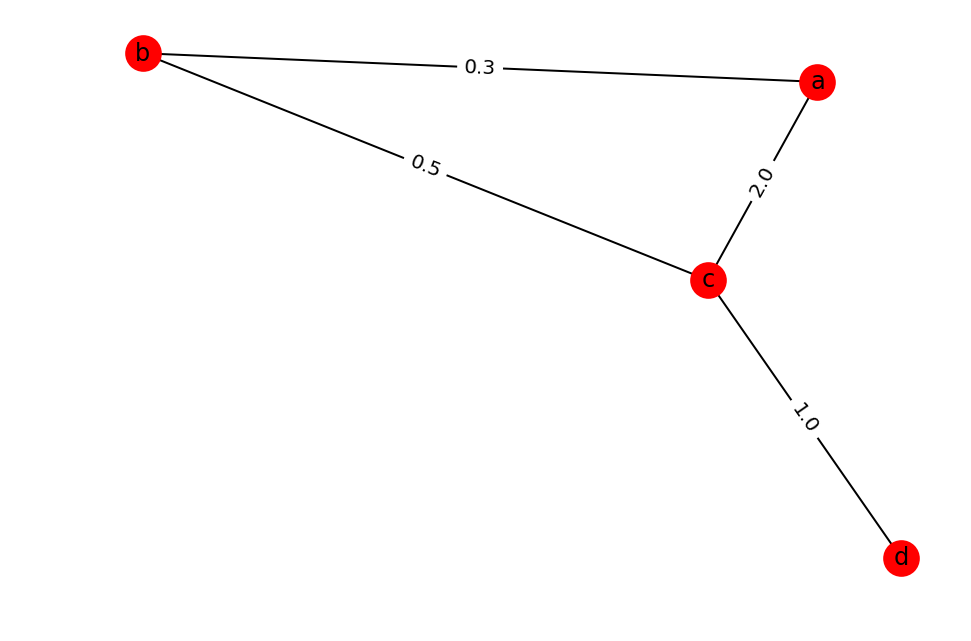

In [67]:
W = nx.Graph()
W.add_edge('a', 'b', weight=0.3)
W.add_edge('b', 'c', weight=0.5)
W.add_edge('a', 'c', weight=2.0)
W.add_edge('c', 'd', weight=1.0)
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

In [68]:
nx.shortest_path(W, 'a', 'd')

['a', 'c', 'd']

In [69]:
nx.shortest_path(W, 'a', 'd',weight='weight')

['a', 'b', 'c', 'd']

In [70]:
nx.shortest_path_length(W, 'a', 'd',weight='weight')

1.8

### Illustrate paths in the Florentine families graph

Shortest paths are not unique, we can have more of one path with the same length. You can use **nx.all_shortest_paths** to get all shortest paths.

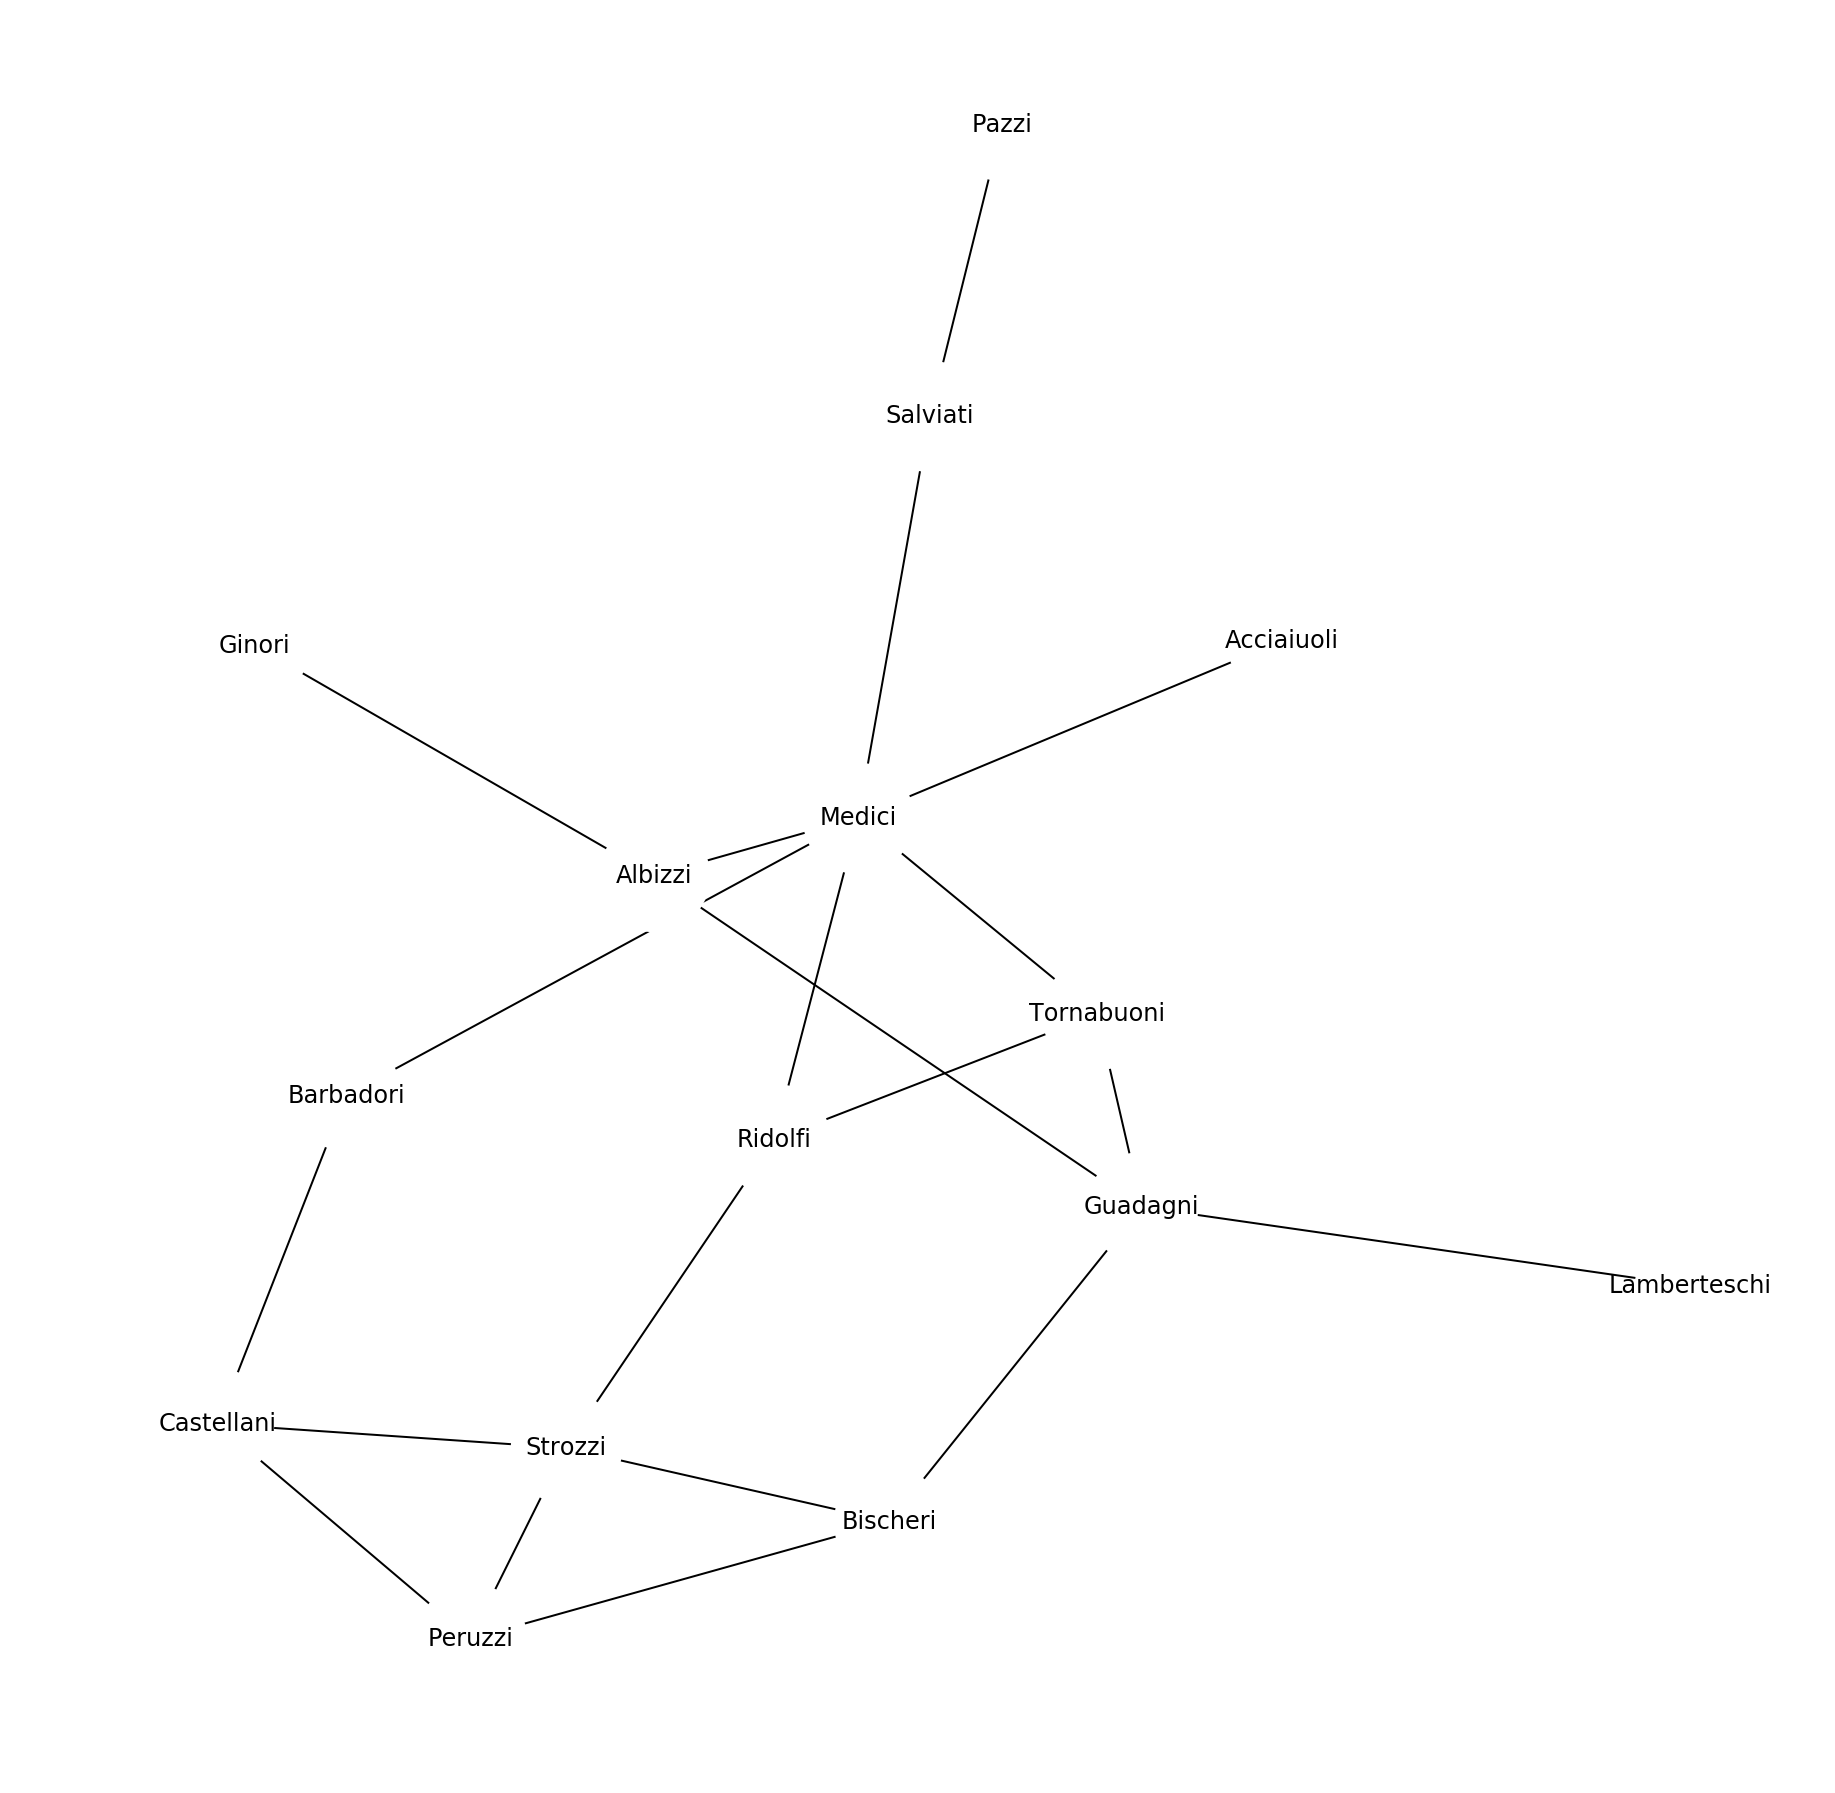

In [71]:
G = nx.florentine_families_graph()
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='white', with_labels=True)

In [72]:
source = 'Medici'
target = 'Peruzzi'
nx.shortest_path(G, source, target)

['Medici', 'Barbadori', 'Castellani', 'Peruzzi']

In [73]:
# Shortest paths are not unique
list(nx.all_shortest_paths(G, source, target))

[['Medici', 'Barbadori', 'Castellani', 'Peruzzi'],
 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']]

In [74]:
def plot_paths(G, paths):
    plt.figure(figsize=(12,12))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=3000, node_color='white')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

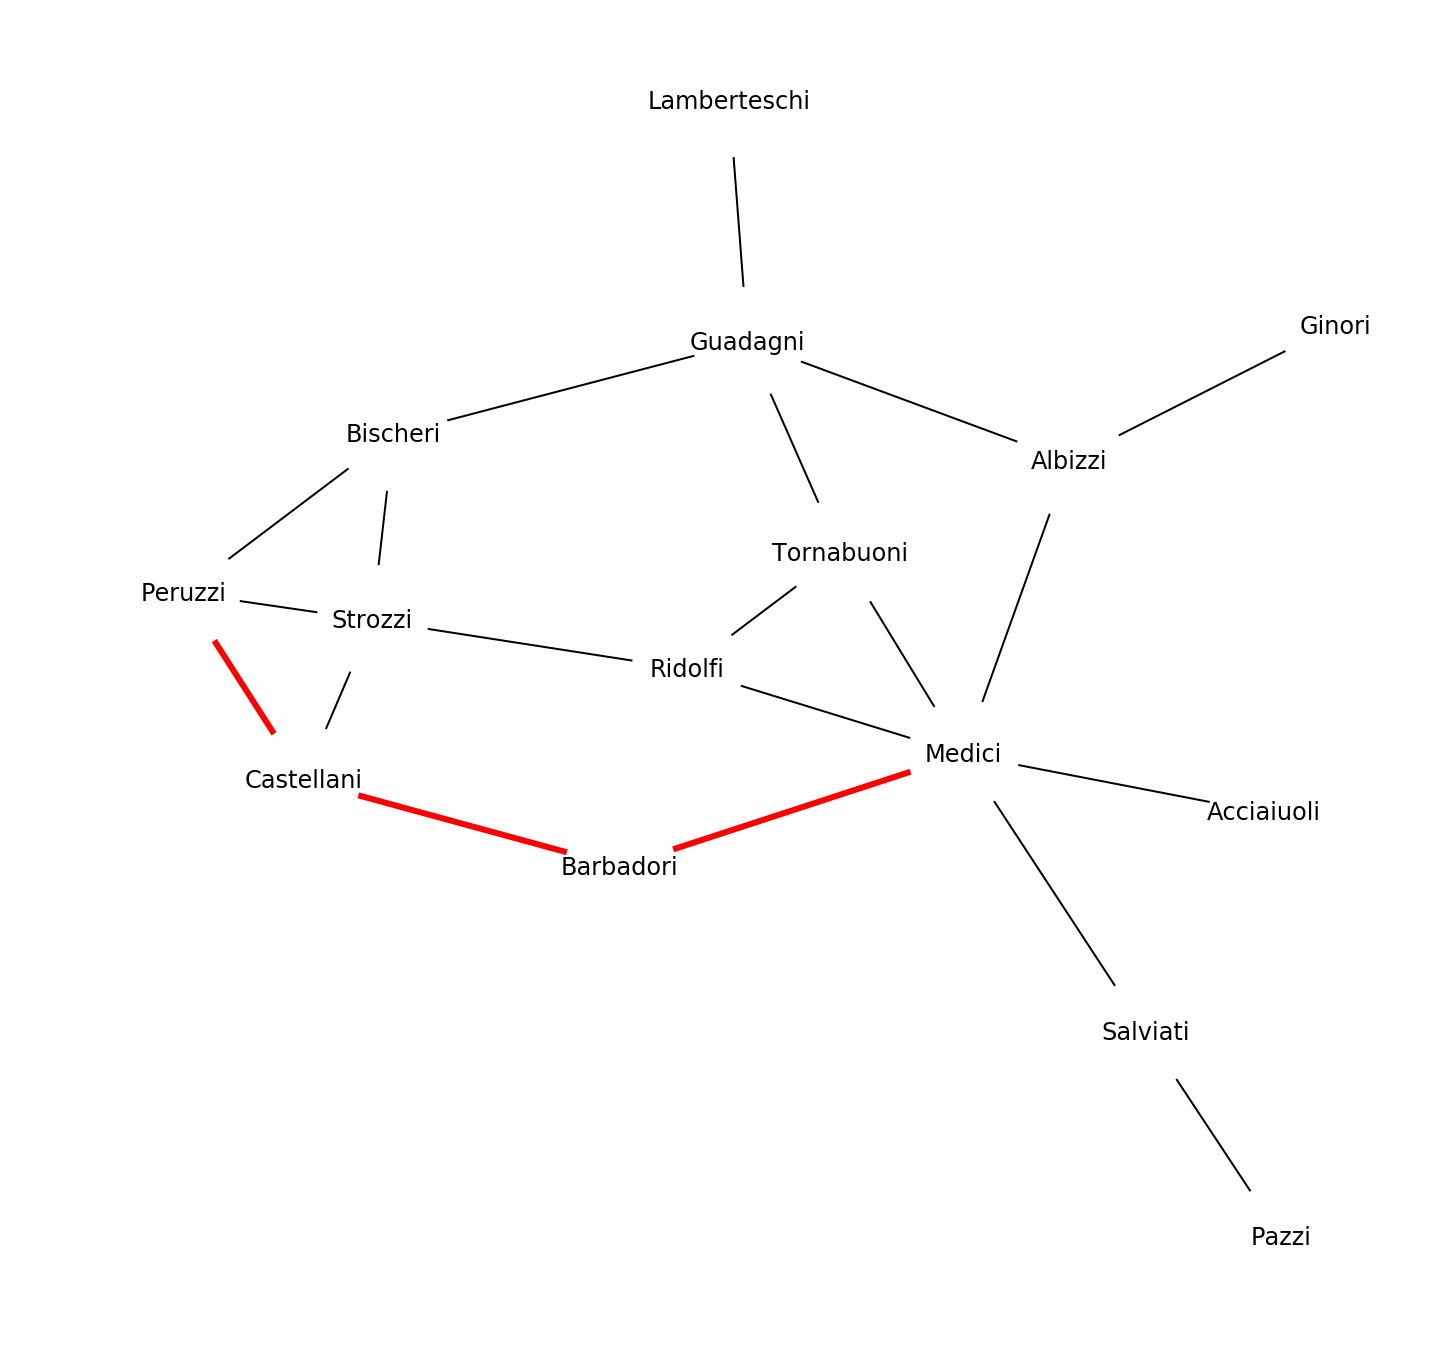

In [75]:
plot_paths(G, [nx.shortest_path(G, source, target)])

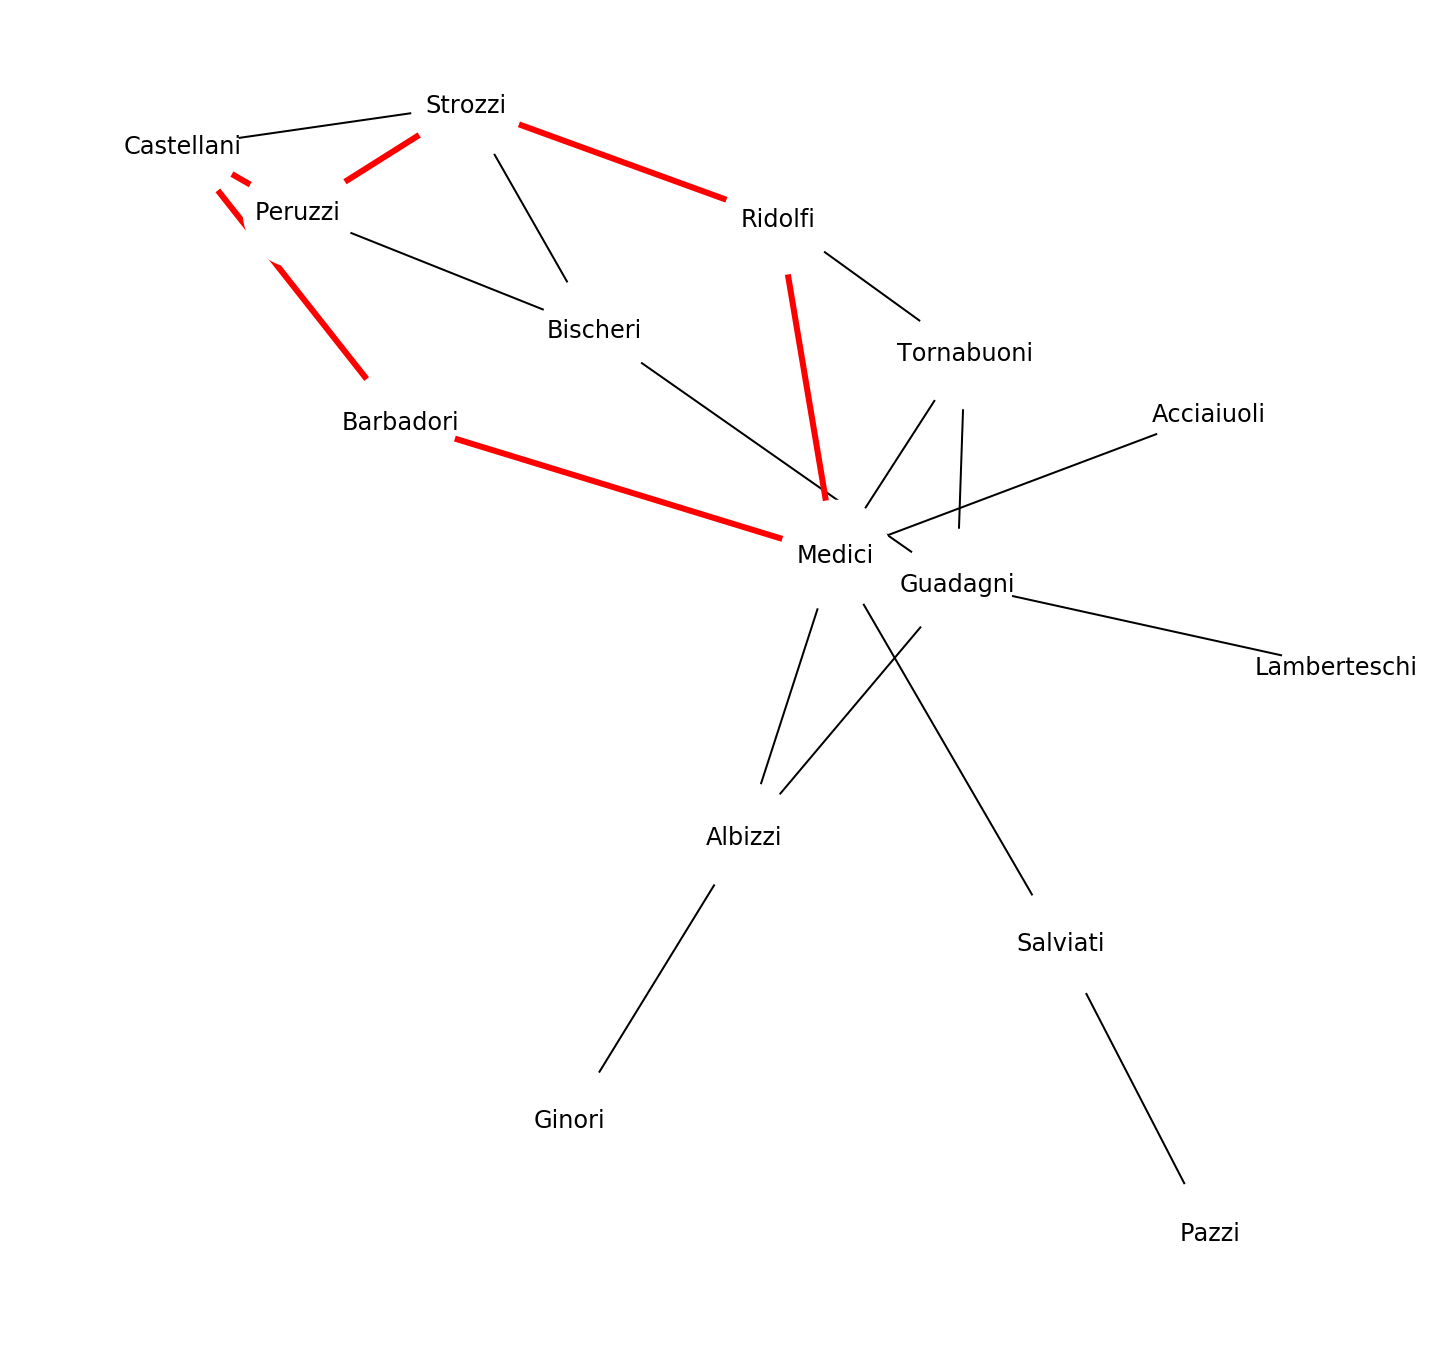

In [76]:
plot_paths(G, nx.all_shortest_paths(G, source, target))

In [77]:
for i, path in enumerate(nx.all_simple_paths(G, source, target), 1):
    print(i, path)

1 ['Medici', 'Barbadori', 'Castellani', 'Peruzzi']
2 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Peruzzi']
3 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
4 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Bischeri', 'Peruzzi']
5 ['Medici', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
6 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']
7 ['Medici', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
8 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
9 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Strozzi', 'Castellani', 'Peruzzi']
10 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Strozzi', 'Peruzzi']
11 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
12 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Peruzzi']
13 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
14 ['Medici', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
15 ['Medic

In [78]:
for i, path in enumerate(nx.shortest_simple_paths(G, source, target), 1):
    print(i, path)

1 ['Medici', 'Barbadori', 'Castellani', 'Peruzzi']
2 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']
3 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Peruzzi']
4 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Peruzzi']
5 ['Medici', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
6 ['Medici', 'Albizzi', 'Guadagni', 'Bischeri', 'Peruzzi']
7 ['Medici', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
8 ['Medici', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
9 ['Medici', 'Ridolfi', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Peruzzi']
10 ['Medici', 'Barbadori', 'Castellani', 'Strozzi', 'Bischeri', 'Peruzzi']
11 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Castellani', 'Peruzzi']
12 ['Medici', 'Albizzi', 'Guadagni', 'Bischeri', 'Strozzi', 'Peruzzi']
13 ['Medici', 'Tornabuoni', 'Guadagni', 'Bischeri', 'Strozzi', 'Peruzzi']
14 ['Medici', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Bischeri', 'Peruzzi']
15 ['Medici', 'Albizzi', 'Guadagni', 'Tornabuoni', 'Ridolfi', 'Strozzi', 'Peruzzi']
16 ['Medici', 'Ri

### Node centrality analysis: measures and their relation

Centrality analysis allows us to identify the most important nodes (ie actors) of a network. The definition of importance depends on the network that we analyze and the nature of the relations that it models. There are a lot of wellknown centrality measures, and NetworkX provides implementations for most of them (you can see the list of centrality measures at [centrality documentation](http://networkx.readthedocs.io/en/latest/reference/algorithms.centrality.html)).

We'll focus here on four essential measures using as an example the network of relations between elite families in renaissance Florence. In this concrete example relations in the network represent marriage ties between families.

In the beginning of the 14 century, the Medici family was not the richest nor the one with more formal political power (seats in the city council) on the city republic of Florence, but their relation to other elite families put them in a position of power that allow them to became the city's leading family, a position they would hold for the next three centuries.

Analyzing this network we can see that the Medici family had a central position.

NetworkX provides the network of florentine families modeled as an undirected graph:

In [79]:
G = nx.florentine_families_graph()

### Degree Centrality

The degree of a node in an undirected graph is the number of incident edges of the node, that is, the number of neighbors that it has on the graph.

The degree centrality mesaure is the the number of neighbors of each node divided by the maximum number of neighbors that it could have. In an undirected graph, this is $n-1$ where $n$ is the total number of nodes of the graph.

The output of the function **nx.degree_centrality** is a dictionary whose keys are the nodes and their value is the degree centrality score. Functions that implement node level measures in NetworkX, such as centrality scores, always return their result as a dictionary, with nodes as keys and the concrete score for that node as a value.

In [80]:
from operator import itemgetter

In [81]:
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.42857142857142855),
 ('Strozzi', 0.2857142857142857),
 ('Guadagni', 0.2857142857142857),
 ('Castellani', 0.21428571428571427),
 ('Peruzzi', 0.21428571428571427),
 ('Ridolfi', 0.21428571428571427),
 ('Tornabuoni', 0.21428571428571427),
 ('Albizzi', 0.21428571428571427),
 ('Bischeri', 0.21428571428571427),
 ('Barbadori', 0.14285714285714285),
 ('Salviati', 0.14285714285714285),
 ('Acciaiuoli', 0.07142857142857142),
 ('Pazzi', 0.07142857142857142),
 ('Ginori', 0.07142857142857142),
 ('Lamberteschi', 0.07142857142857142)]

### Betweenness centrality

Betweenness centrality of a node `v` is the sum of the fraction of all-pairs shortest paths that pass through `v`: 

$$ c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)} $$

where `V` is the set of nodes, $\sigma(s, t)$ is the number of shortest `(s, t)`-paths,  and $\sigma(s, t|v)$ is the number of those paths passing through `v`.

In [82]:
bet = nx.betweenness_centrality(G)
# let's list the scores
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.521978021978022),
 ('Guadagni', 0.2545787545787546),
 ('Albizzi', 0.21245421245421245),
 ('Salviati', 0.14285714285714288),
 ('Ridolfi', 0.11355311355311355),
 ('Bischeri', 0.1043956043956044),
 ('Strozzi', 0.10256410256410257),
 ('Barbadori', 0.09340659340659341),
 ('Tornabuoni', 0.09157509157509157),
 ('Castellani', 0.05494505494505495),
 ('Peruzzi', 0.02197802197802198),
 ('Acciaiuoli', 0.0),
 ('Pazzi', 0.0),
 ('Ginori', 0.0),
 ('Lamberteschi', 0.0)]

### Closeness centrality

Closeness centrality of a node `u` is the reciprocal of the sum of the shortest path distances from `u` to all `n-1` other nodes. Since the sum of distances depends on the number of nodes in the graph, closeness is normalized by the sum of minimum possible distances `n-1`.

$$C(u) = \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$$

where `d(v, u)` is the shortest-path distance between `v` and `u`, and `n` is the number of nodes in the graph. Notice that higher values of closeness indicate higher centrality.


In [83]:
clos = nx.closeness_centrality(G)
# let's list the scores
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.56),
 ('Ridolfi', 0.5),
 ('Tornabuoni', 0.4827586206896552),
 ('Albizzi', 0.4827586206896552),
 ('Guadagni', 0.4666666666666667),
 ('Strozzi', 0.4375),
 ('Barbadori', 0.4375),
 ('Bischeri', 0.4),
 ('Castellani', 0.3888888888888889),
 ('Salviati', 0.3888888888888889),
 ('Acciaiuoli', 0.3684210526315789),
 ('Peruzzi', 0.3684210526315789),
 ('Ginori', 0.3333333333333333),
 ('Lamberteschi', 0.32558139534883723),
 ('Pazzi', 0.2857142857142857)]

### Eigenvector Centrality

Eigenvector centrality assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

Google's pagerank score is a variant of eigenvector centrality (NetworkX also implements the pagerank algorithm).

In [84]:
eig = nx.eigenvector_centrality(G)
# let's list the scores
sorted(eig.items(), key=itemgetter(1), reverse=True)

[('Medici', 0.4303154258349923),
 ('Strozzi', 0.3559730326460451),
 ('Ridolfi', 0.3415544259074365),
 ('Tornabuoni', 0.325846704169574),
 ('Guadagni', 0.2891171573226501),
 ('Bischeri', 0.2827943958713356),
 ('Peruzzi', 0.2757224374104833),
 ('Castellani', 0.2590200378423514),
 ('Albizzi', 0.2439605296754477),
 ('Barbadori', 0.2117057470647985),
 ('Salviati', 0.14592084164171834),
 ('Acciaiuoli', 0.1321573195285342),
 ('Lamberteschi', 0.08879253113499548),
 ('Ginori', 0.0749245316027793),
 ('Pazzi', 0.044814939703863084)]

### Relation between centraity measures 

As we can see the Medici family is the most important node in the network in all four centrality measures analyzed here. This is not always the case. When analyzing the node centrality of a network is important to think about the kind of realtions that it models, and choose the centrality measure that fits better in our concrete case.

In practice it's useful to plot the relations between centrality scores to see their correlation and see up to which point they provide redundant information. We can do this easily using Pandas and seaborn.

In [85]:
import pandas as pd
import seaborn as sns

In [86]:
centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
    'eigenvector': eig,
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness,eigenvector
Acciaiuoli,0.071429,0.000000,0.368421,0.132157
Albizzi,0.214286,0.212454,0.482759,0.243961
Barbadori,0.142857,0.093407,0.437500,0.211706
Bischeri,0.214286,0.104396,0.400000,0.282794
Castellani,0.214286,0.054945,0.388889,0.259020
Ginori,0.071429,0.000000,0.333333,0.074925
Guadagni,0.285714,0.254579,0.466667,0.289117
Lamberteschi,0.071429,0.000000,0.325581,0.088793
Medici,0.428571,0.521978,0.560000,0.430315
Pazzi,0.071429,0.000000,0.285714,0.044815


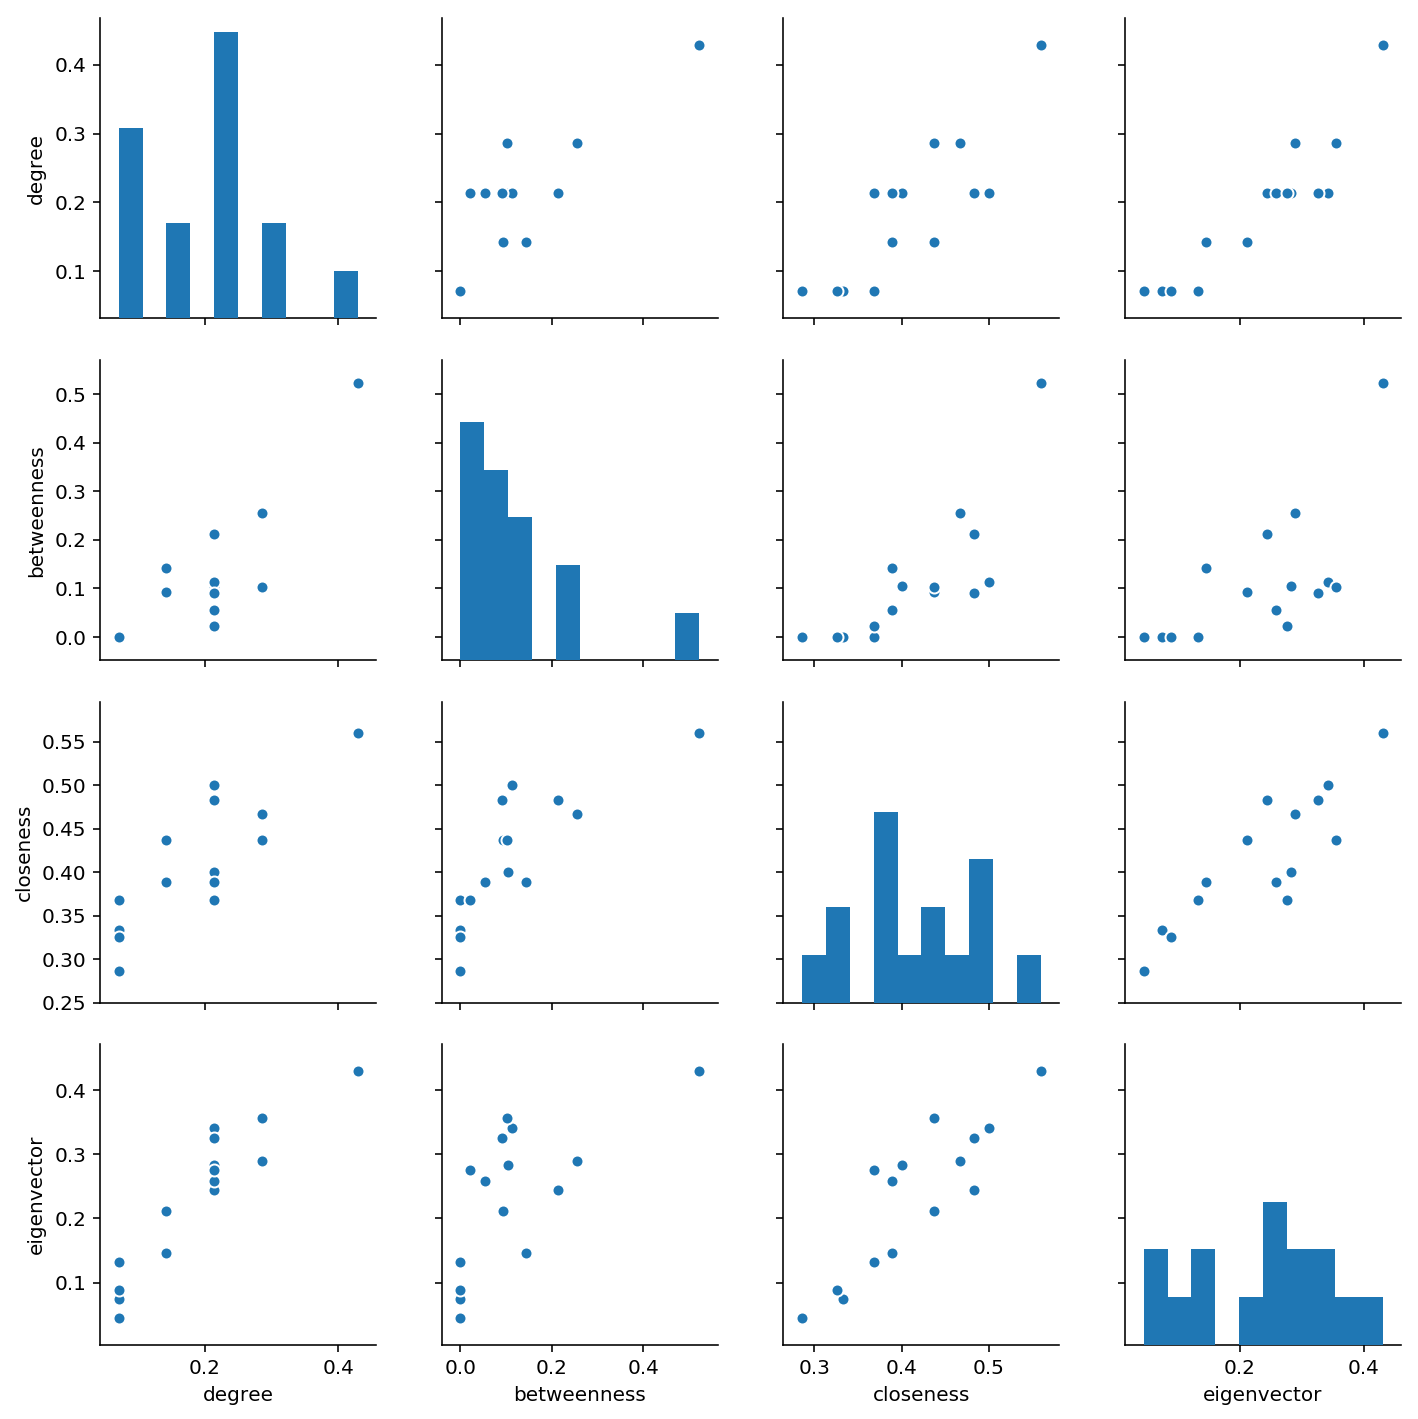

In [87]:
sns.pairplot(centrality)

#### An example of a graph without high correlation between centrality measures

As a couterexample, the graph below has low correlation between some of the centrality measures. This graph is composed by two random graphs joined by a node with an edge to one node of each random graph. The node bridging the two random graphs is in the middle of most shortest paths, and is closer to all other nodes than the nodes in the random graphs; but it only has two incident edges. Thus, it has high betweenness and closeness values but low degree and eigenvector centrality.  

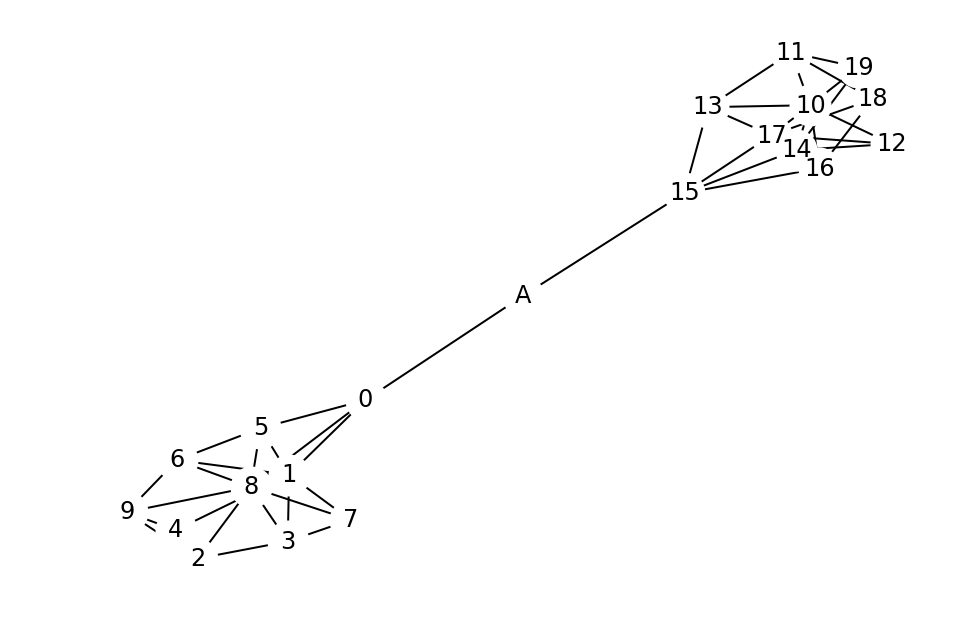

In [88]:
#B = nx.barbell_graph(10, 1)
done = False
while not done:
    B = nx.disjoint_union(nx.fast_gnp_random_graph(10, 0.5), nx.fast_gnp_random_graph(10, 0.5))
    B.add_edges_from([('A', 0), ('A', 15)])
    try:
        eig = nx.eigenvector_centrality(B)
        if nx.is_connected(B):
            done = True
    except:
        pass
nx.draw(B, node_size=400, node_color='white', with_labels=True)

#### Exercise

Analyze the node centrality metrics for the example graph $B$ defined in the previous cell. List the node centrality scores in reverse order.

Then build a pandas DataFrame with nodes as rows and centrality metrics as columns. Plot a pairplot using seaborn to graphically see the correlation between centrality measures. How it's different from the correlations between centrality scores from the florentine families example?

In [89]:
# Degree Centrality


In [90]:
# Betweenness Centrality


In [91]:
# Closeness centrality


In [92]:
# Eigenvector centrality


In [93]:
# Build a pandas DataFrame with nodes as rows and centrality scores as columns


In [94]:
# Plot a pairplot of the centrality scores to see their correlation
